In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import Dataset,DataLoader,random_split
import numpy as np
import os
import matplotlib.pyplot as plt
import torch.nn.functional as F

from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import accuracy_score
import numpy as np
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split



In [5]:
transform=transforms.Compose([transforms.Resize((224,224), interpolation=transforms.InterpolationMode.BILINEAR), transforms.ToTensor()])
data=torchvision.datasets.ImageFolder(root='/Users/mahesh/Downloads/cnn_dataset',transform=transform)
data

Dataset ImageFolder
    Number of datapoints: 100800
    Root location: /Users/mahesh/Downloads/cnn_dataset
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

no of classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
no of unique features: 36
label counts: Counter({0: 2800, 1: 2800, 2: 2800, 3: 2800, 4: 2800, 5: 2800, 6: 2800, 7: 2800, 8: 2800, 9: 2800, 10: 2800, 11: 2800, 12: 2800, 13: 2800, 14: 2800, 15: 2800, 16: 2800, 17: 2800, 18: 2800, 19: 2800, 20: 2800, 21: 2800, 22: 2800, 23: 2800, 24: 2800, 25: 2800, 26: 2800, 27: 2800, 28: 2800, 29: 2800, 30: 2800, 31: 2800, 32: 2800, 33: 2800, 34: 2800, 35: 2800})


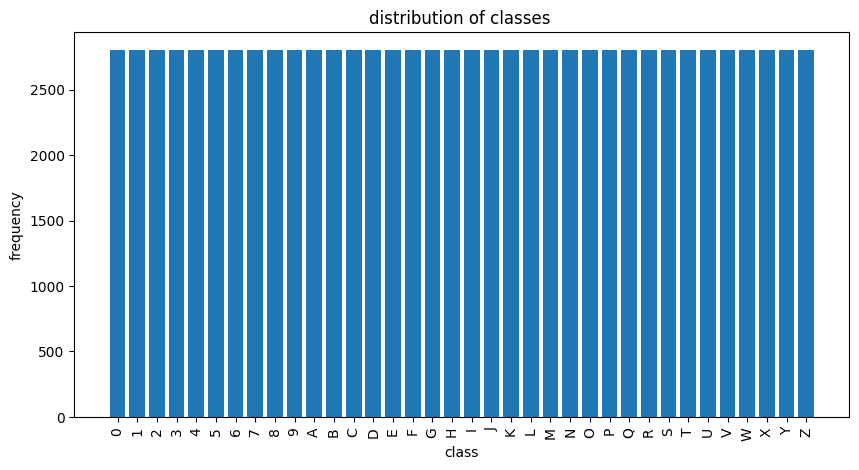

images : 100800


In [6]:
from collections import Counter
classes=data.classes
print("no of classes:",classes)
ft_unique=len(classes)
print("no of unique features:",ft_unique)
label=Counter(data.targets)
print("label counts:",label)
plt.figure(figsize=(10, 5))
plt.bar(classes, label.values())
plt.xlabel('class')
plt.ylabel('frequency')
plt.title('distribution of classes ')
plt.xticks(rotation=90)
plt.show()
print(f'images : {len(data)}')


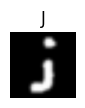

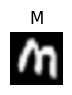

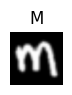

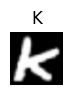

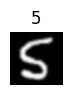

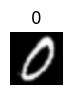

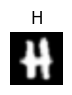

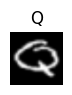

In [7]:
from ast import Index
import random
def imshow(img, title):
    image = img.numpy().transpose((1, 2, 0))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()


plt.figure(figsize=(8, 5))
for i in range(8):
    index = random.randint(0, len(data) - 1)
    image, label = data[index]
    plt.subplot(1, 8, i+1)
    imshow(image, title=classes[label])

plt.show()

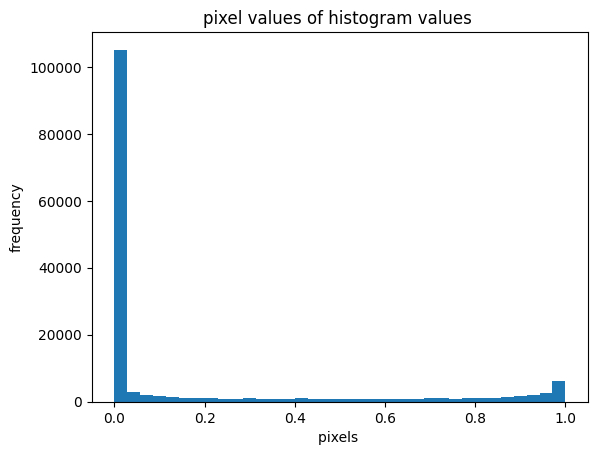

In [8]:
import random
index = random.randint(0, len(data) - 1)
image, _ = data[index]
pix = image.flatten().numpy()
plt.hist(pix, bins=35)
plt.title('pixel values of histogram values ')
plt.xlabel('pixels ')
plt.ylabel('frequency')
plt.show()

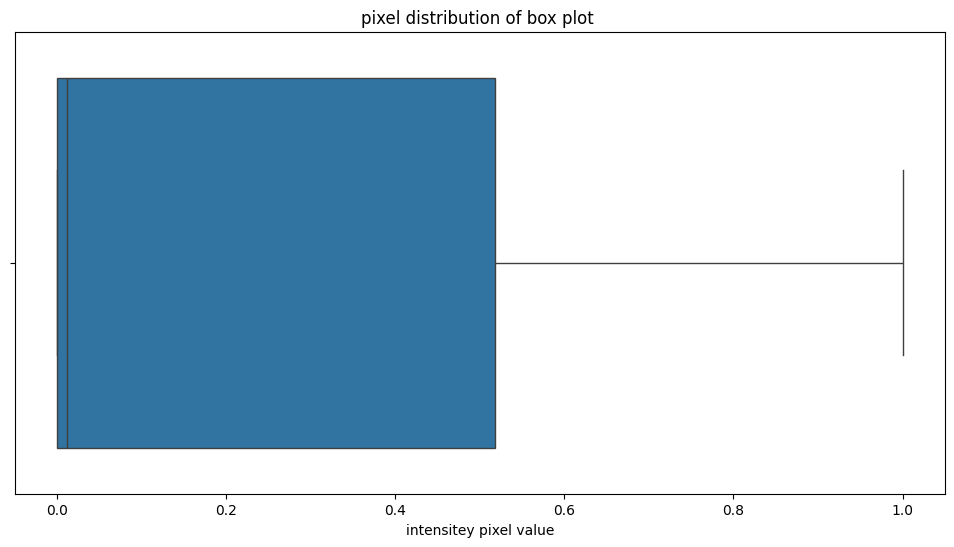

In [9]:
import seaborn as sbn
import matplotlib.pyplot as plt

rand_img, _ = data[10]
random_image = rand_img.permute(1, 2, 0).numpy()
pixel_values = random_image.ravel()

plt.figure(figsize=(12, 6))
sbn.boxplot(x=pixel_values)
plt.xlabel("intensitey pixel value")
plt.title("pixel distribution of box plot ")
plt.show()


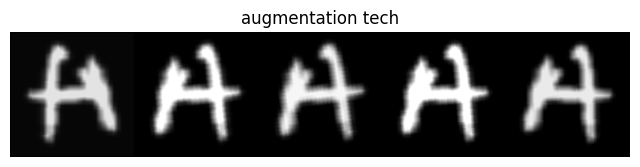

In [10]:
import torch
import torchvision
from torchvision import transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

transformss = transforms.Compose([transforms.RandomHorizontalFlip(),transforms.RandomRotation(10),transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2)])

random_image, _ = data[29500]
image_augmented = [transformss(random_image) for _ in range(5)]
img_grid = make_grid(image_augmented, nrow=5)

plt.figure(figsize=(8, 5))
plt.imshow(img_grid.permute(1, 2, 0).numpy())
plt.axis('off')
plt.title("augmentation tech")
plt.show()


In [12]:
dataset=len(data)
train_data=int(0.7*dataset)
val_data=int(0.15*dataset)
test_data=dataset-train_data-val_data
training_data,valid_data,testing_data=random_split(data,[train_data,val_data,test_data])
print("training  data:",len(training_data))
print("validation data:",len(valid_data))
print("testing data:",len(testing_data))

training  data: 70560
validation data: 15120
testing data: 15120


In [13]:
import torch

if torch.cuda.is_available():
  device=torch.device('cuda')
else:
  device=torch.device('cpu')
print(device)

cpu


In [14]:
train_loader=DataLoader(training_data,batch_size=128,shuffle=True)
val_loader=DataLoader(valid_data,batch_size=128,shuffle=True)
test_loader=DataLoader(testing_data,batch_size=128,shuffle=True)

In [15]:
import torch.nn as nn
import torch.nn.functional as F
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1=nn.Conv2d(3,16,kernel_size=3,stride=1,padding=1)
    self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
    self.conv2=nn.Conv2d(16,32,kernel_size=3,stride=1,padding=1)
    #self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
    self.conv3=nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1)
    #self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
    self.conv4=nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1)
    self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
    self.fc1=nn.Linear(25088,256)
    self.fc2=nn.Linear(256,128)
    self.fc3=nn.Linear(128,36)

  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=self.pool(F.relu(self.conv3(x)))
    x=self.pool(F.relu(self.conv4(x)))
    x=x.view(x.size(0),-1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x

model=CNN()
criterion=nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

best_val_loss = float('inf')
patience = 5
early_stopping_counter = 0
epochs = 5
train_acc_values = []
val_acc_values = []
train_loss_values = []
val_loss_values = []
model =model.to(device)
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs.to(device)).to(device)

        loss = criterion(outputs.to(device), labels.to(device))


        l2_reg = 0
        for param in model.parameters():
            l2_reg += torch.norm(param, 2)
        loss += 1e-5 * l2_reg

        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = correct_train / total_train
    train_loss /= len(train_loader)

    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs.to(device)).to(device)

            loss = criterion(outputs.to(device), labels.to(device))
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)

    scheduler.step(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), 'cnn_model.pth')
    else:
        early_stopping_counter += 1

    if early_stopping_counter >= patience:
        print("stop the model if early triggering was occured .")
        break

    print(f'Epoch [{epoch + 1}/{epochs}], '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')
    train_acc_values.append(train_accuracy)
    val_acc_values.append(val_accuracy)
    train_loss_values.append(train_loss)
    val_loss_values.append(val_loss)




Epoch [1/5], Train Loss: 0.6944, Train Acc: 0.7803, Val Loss: 0.3756, Val Acc: 0.8738
Epoch [2/5], Train Loss: 0.3245, Train Acc: 0.8839, Val Loss: 0.3169, Val Acc: 0.8893
Epoch [3/5], Train Loss: 0.2632, Train Acc: 0.9003, Val Loss: 0.3212, Val Acc: 0.8896
Epoch [4/5], Train Loss: 0.2307, Train Acc: 0.9106, Val Loss: 0.3056, Val Acc: 0.8929
Epoch [5/5], Train Loss: 0.1980, Train Acc: 0.9211, Val Loss: 0.3078, Val Acc: 0.8962


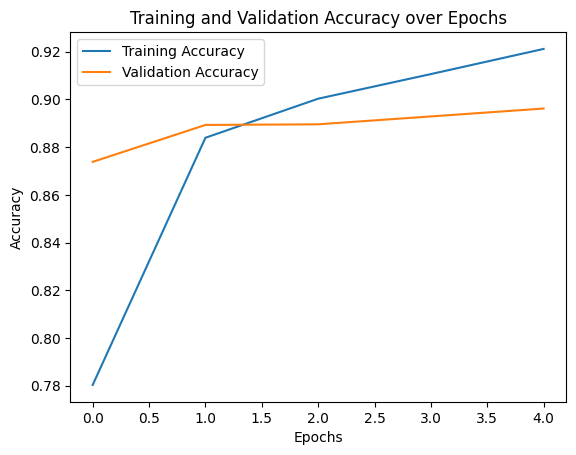

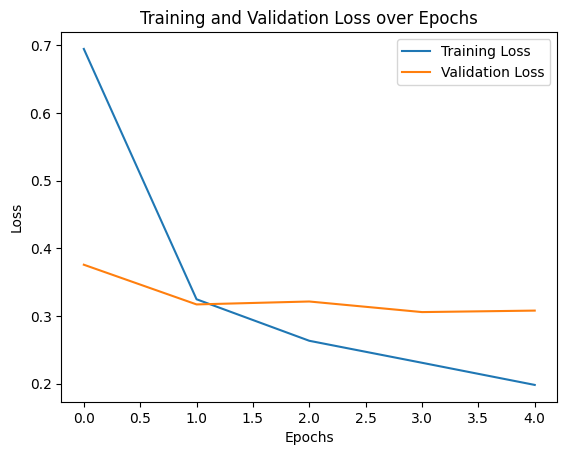

In [17]:

import matplotlib.pyplot as plt
plt.plot(train_acc_values, label='Training Accuracy')
plt.plot(val_acc_values, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()


plt.plot(train_loss_values, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [19]:
best_model = CNN()

best_model.load_state_dict(torch.load('cnn_model.pth'))
best_model = best_model.to(device)
test_loss = 0.0
predictions = []
targets = []

best_model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = best_model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        predictions.extend(torch.argmax(outputs, dim=1).tolist())
        targets.extend(labels.tolist())

test_accuracy = accuracy_score(targets, predictions)
test_loss /= len(test_loader)

print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')



Test Accuracy: 0.8903, Test Loss: 0.2990


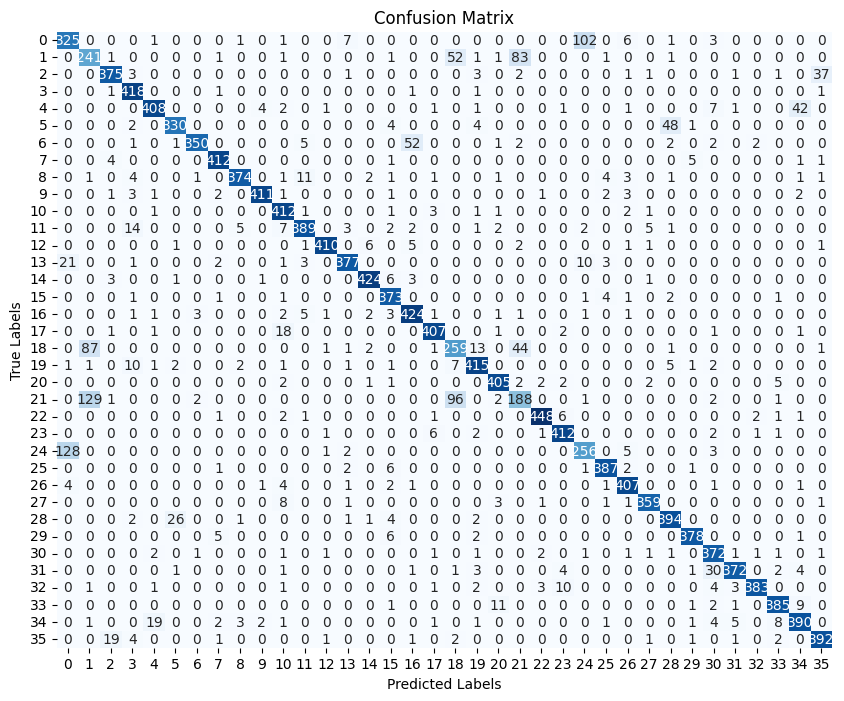

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(targets, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


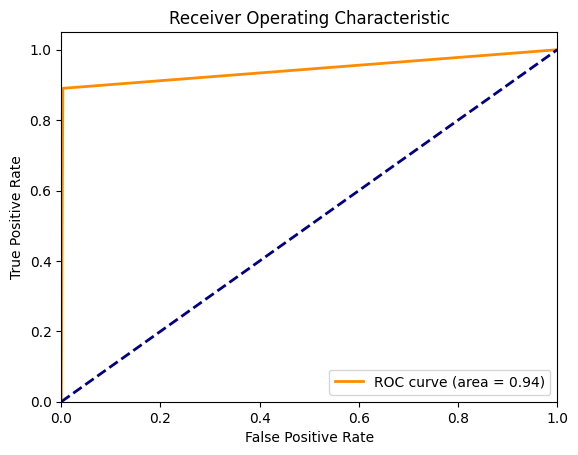

In [22]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, accuracy_score
y_true = label_binarize(targets, classes=range(36))
y_score = label_binarize(predictions, classes=range(36))

fpr, tpr, _ = roc_curve(y_true.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(targets, predictions, average='macro')
recall = recall_score(targets, predictions, average='macro')
f1 = f1_score(targets, predictions, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.8908605885412739
Recall: 0.8895804581118187
F1 Score: 0.8891161325737706


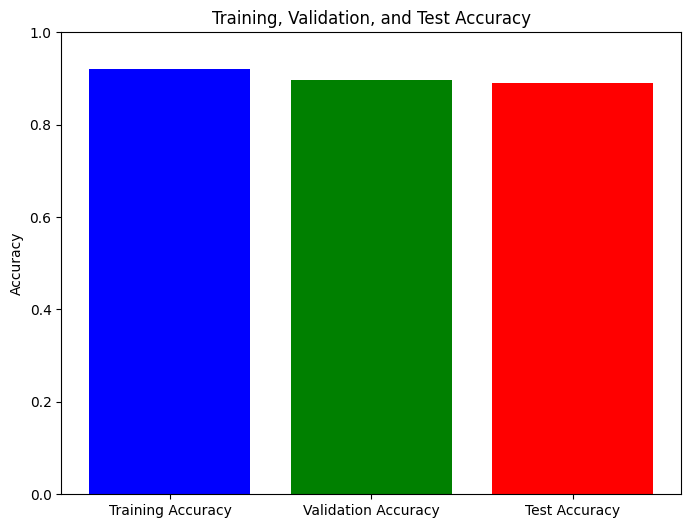

In [23]:
labels = ['Training Accuracy', 'Validation Accuracy', 'Test Accuracy']
accuracies = [train_acc_values[-1], val_acc_values[-1], test_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.show()

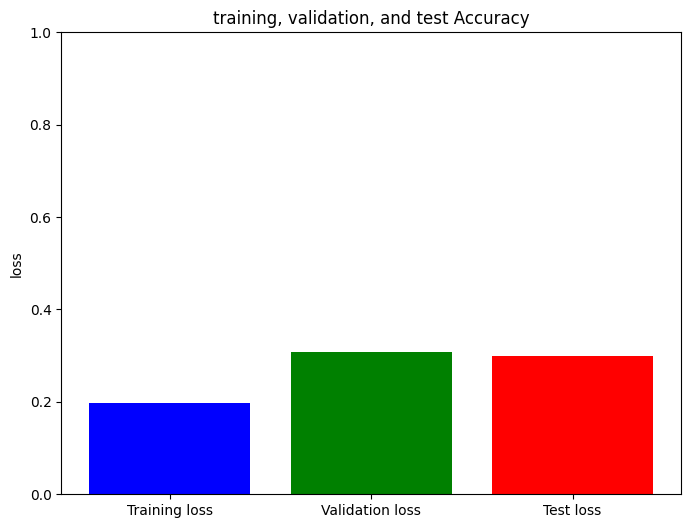

In [24]:
labels = ['Training loss', 'Validation loss', 'Test loss']
accuracies = [train_loss_values[-1], val_loss_values[-1], test_loss]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.title('training, validation, and test Accuracy')
plt.show()

In [ ]:
### Resources 

In [ ]:
https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
https://medium.com/@siddheshb008/alexnet-architecture-explained-b6240c528bd5

In [ ]:
https://medium.com/@draj0718/convolutional-neural-networks-cnn-architectures-explained-716fb197b243

In [ ]:
https://pytorch.org/docs/stable/index.html

In [ ]:
https://datasets.activeloop.ai/docs/ml/datasets/emnist-dataset/

In [ ]:
https://stackoverflow.com/questions/37228371/visualize-mnist-dataset-using-opencv-or-matplotlib-pyplot